<h4> CO4: Imaging for the Life Sciences </h4>
<h2>PET</h2>


<h4>1. Load and Plot</h4>

Download nuclear imaging data from:<br>
"Y-90 patients PET/CT & SPECT/CT and corresponding contours dataset" (University of Michigan library)<br> --> https://deepblue.lib.umich.edu/data/concern/data_sets/st74cq55j

*Note: Only data of **patient_A** is needed*

The following function loads a DICOM image using the Python module **pydicom**<br>
(*install required modules if necessary*)

In [6]:
import pydicom

def load_dicom_image(file_path):
    """
    Load a DICOM image
    
    Parameters:
    - file_path: Path to the DICOM file
    
    Returns:
    - dicom_image: 2D numpy array representing the DICOM image
    """

    # Load the DICOM file and return it as a numpy array
    return pydicom.dcmread(file_path).pixel_array

For the next steps a slice of the torso including the liver is used. For an anatomical inspection, the CT image shall be plotted. Load and plot the following file:
- Folder: "patient_A"
- Subfolder: "patient.A_ANON82028_CT_2019-08-16_131455_NM.PET.TUMOR.LOC.LIMITED.AREA_CT..3.0..I30f..3.PET_n182__00000"
- File: "2.16.840.1.114362.1.11854208.23245207756.529809189.1039.535.dcm"

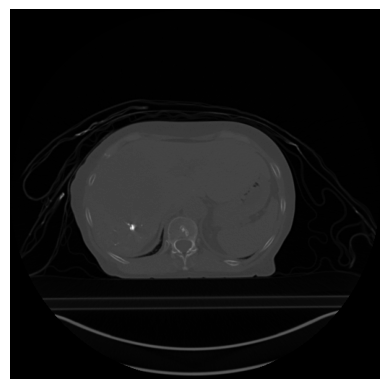

In [7]:
import matplotlib.pyplot as plt

# load and plot the CT image
file = "../patient_A/patient.A_ANON82028_CT_2019-08-16_131455_NM.PET.TUMOR.LOC.LIMITED.AREA_CT..3.0..I30f..3.PET_n182__00000/2.16.840.1.114362.1.11854208.23245207756.529809189.1039.535.dcm"
ct_image = load_dicom_image(file)
plt.imshow(ct_image, cmap="gray")
plt.axis("off")
plt.show()

Next let's have a look at the corresponding PET image. Load and plot the following file:
- Folder: "patient_A"
- Subfolder: "patient.A_ANON82028_PT_2019-08-16_131455_NM.PET.TUMOR.LOC.LIMITED.AREA_PET.WB.truex.TOF_n122__00000"
- File: "2.16.840.1.114362.1.11854208.23245207756.529809191.396.826.dcm"

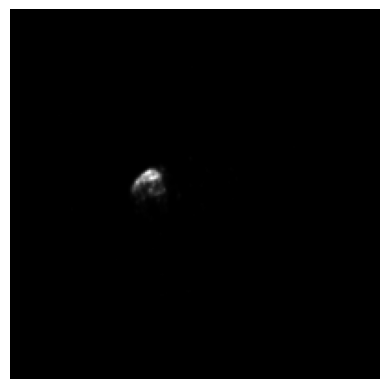

In [8]:
# load and plot the PET image
file = "../patient_A/patient.A_ANON82028_PT_2019-08-16_131455_NM.PET.TUMOR.LOC.LIMITED.AREA_PET.WB.truex.TOF_n122__00000/2.16.840.1.114362.1.11854208.23245207756.529809191.396.826.dcm"
pet_image = load_dicom_image(file)
plt.imshow(pet_image, cmap="gray")
plt.axis("off")
plt.show()

<h4>2. Image Fusion</h4>

PET/CT images are shown as image "fusion", i.e., the CT image is shwon in the background as grayscale image, while the PET image is overlaid as a color image.

Since it is always a good idea to apply *Windowing* to the CT image, we start with the windowing function:

In [9]:
import numpy as np

def apply_windowing(image, window_center, window_width):
    """
    Apply CT windowing to an image.
    
    Parameters:
    - image: 2D numpy array representing the DICOM image
    - window_center: Window level (WL)
    - window_width: Window width (WW)
    
    Returns:
    - windowed_image: 2D numpy array representing the windowed image
    """

    # Compute the window boundaries
    min_value = window_center - (window_width / 2)
    max_value = window_center + (window_width / 2)

    # Apply the windowing
    windowed_image = np.clip(image, min_value, max_value)
    windowed_image = np.round((windowed_image - min_value) / window_width * 255)
    return windowed_image

Next a function is needed that ensures both images have the same size.<br>The method **zoom** in the Python module **scipy.ndimage** can be used for resizing an image.<br>
(*install required modules if necessary*)

Complete the code of the following resize-function:

In [10]:
from scipy.ndimage import zoom

def resize_image(target_image, reference_image):
    """
    Resize the target image to match the dimensions of the reference image.
    
    Parameters:
    - target_image: 2D numpy array representing the image to be resized
    - reference_image: 2D numpy array representing the reference image
    
    Returns:
    - resized_image: 2D numpy array representing the resized image
    """
    # Calculate the zoom factor
    rows_ratio = reference_image.shape[0] / target_image.shape[0]
    cols_ratio = reference_image.shape[1] / target_image.shape[1]
    zoom_factor = (rows_ratio, cols_ratio)

    # Resize the image
    resized_image = zoom(target_image, zoom_factor, order=3)  # order=3 is for cubic interpolation

    return resized_image

Now all helper functions are ready. Complete the following code to plot a PET/CT "Fusion Image": 

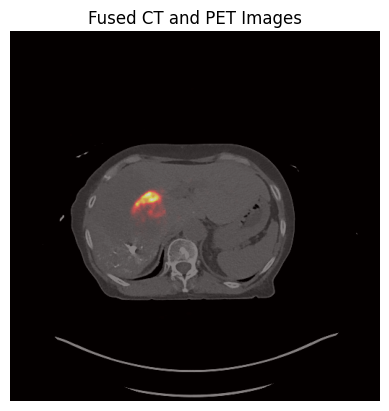

In [18]:
# Apply windowing to the CT image
window_center = 1000
window_width = 500
ct_image_windowed = apply_windowing(ct_image, window_center, window_width)

# Normalize the PET image to [0, 1] range
pet_image = (pet_image - pet_image.min()) / (pet_image.max() - pet_image.min())

# Resize the PET image to match the CT image's size
pet_image = resize_image(pet_image, ct_image_windowed)

# Create the figure and axes
fig, ax = plt.subplots()

# Display the CT image in grayscale
ax.imshow(ct_image_windowed, cmap='gray')

# Overlay the PET image in color with transparency
ax.imshow(pet_image, cmap='hot', alpha=0.5)  # 'hot' colormap for PET, alpha for transparency

# Customize and show the plot
plt.axis('off')
plt.title('Fused CT and PET Images')
plt.show()